In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

# The target field, called custcat, has four possible values that correspond to the four customer groups, as follows: 1- Basic Service 2- E-Service 3- Plus Service 4- Total Service
# Our objective is to build a classifier, to predict class of new customer

In [6]:
!wget -O teleCust1000t.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv

--2021-06-21 09:59:00--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36047 (35K) [text/csv]
Saving to: 'teleCust1000t.csv'

     0K .......... .......... .......... .....                100% 2.54M=0.01s

2021-06-21 09:59:02 (2.54 MB/s) - 'teleCust1000t.csv' saved [36047/36047]



In [16]:
df=pd.read_csv('teleCust1000t.csv')
df.shape
print(df.isnull().sum())

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64


In [19]:
df['custcat'].value_counts()
# to see how many of each class are in our dataset

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

(array([445., 267., 115.,  52.,  39.,  22.,  12.,  15.,   5.,   5.,   6.,
          2.,   3.,   2.,   0.,   1.,   0.,   2.,   1.,   0.,   1.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([   9.  ,   42.18,   75.36,  108.54,  141.72,  174.9 ,  208.08,
         241.26,  274.44,  307.62,  340.8 ,  373.98,  407.16,  440.34,
         473.52,  506.7 ,  539.88,  573.06,  606.24,  639.42,  672.6 ,
         705.78,  738.96,  772.14,  805.32,  838.5 ,  871.68,  904.86,
         938.04,  971.22, 1004.4 , 1037.58, 1070.76, 1103.94, 1137.12,
        1170.3 , 1203.48, 1236.66, 1269.84, 1303.02, 1336.2 , 1369.38,
        1402.56, 1435.74, 1468.92, 1502.1 , 1535.28, 1568.46, 1601.64,
        1634.82, 1668.  ]),
 <BarContainer object of 50 artists>)

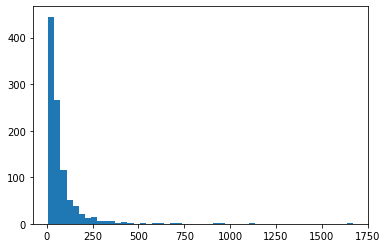

In [21]:
plt.hist(df['income'],bins=50)

In [66]:
cdf=df[['region','tenure','age'	,'marital',	'address',	'income',	'ed',	'employ',	'retire',	'gender'	,'reside'	]]
edf=df['custcat']
x=np.asanyarray(cdf)
y=np.asanyarray(edf)
# y
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:',train_x.shape,train_y.shape)
print ('Test set:',test_x.shape,test_y.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


In [58]:
# normalize data
x=preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x
train_x=x[0:700]
train_y=y[0:700]
test_x=x[700:x.shape[0]]
test_y=y[700:y.shape[0]]

In [67]:
from sklearn.neighbors import KNeighborsClassifier
k=5
neigh=KNeighborsClassifier(k).fit(train_x,train_y)
y_=neigh.predict(test_x)

In [68]:
from sklearn import metrics
print("Train set accuracy is ",metrics.accuracy_score(train_y,neigh.predict(train_x)))
print("Test set accuracy is ",metrics.accuracy_score(test_y,y_))

Train set accuracy is  0.55
Test set accuracy is  0.3


Test set accuracy is  0.275
Test set accuracy is  0.31
Test set accuracy is  0.275
Test set accuracy is  0.26
Test set accuracy is  0.3
Test set accuracy is  0.295
Test set accuracy is  0.35
Test set accuracy is  0.33
Test set accuracy is  0.32
Test set accuracy is  0.32
Test set accuracy is  0.345
Test set accuracy is  0.33
Test set accuracy is  0.32
Test set accuracy is  0.34
Test set accuracy is  0.355
Test set accuracy is  0.32
Test set accuracy is  0.335
Test set accuracy is  0.34
Test set accuracy is  0.355


Text(0.5, 1.0, "accuracy for different k's")

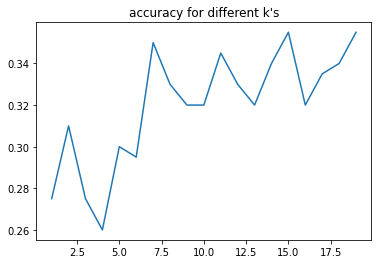

In [69]:
# accuracy for different K's
accuracy=[]
for i in range(1,20):
    neigh=KNeighborsClassifier(i).fit(train_x,train_y)
    y_=neigh.predict(test_x)
    print("Test set accuracy is ",metrics.accuracy_score(test_y,y_))
    accuracy.append(metrics.accuracy_score(test_y,y_))
x=[i for i in range(1,20)]
plt.plot(x,accuracy)
plt.title("accuracy for different k's")